In [1]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# Step 2: Load dataset
df = pd.read_csv("biased_gender_loans.csv")  # adjust path if needed
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   salary  years_exp    sex bank_loan
0    1107         19  Woman        No
1    1267         10  Woman        No
2     896         19  Woman        No
3    1226         16  Woman        No
4    1207         19  Woman        No


In [4]:
# Step 3: Encode categorical columns (if any)
# We'll automatically encode all object-type columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nEncoded dataset preview:")
print(df.head())


Encoded dataset preview:
   salary  years_exp  sex  bank_loan
0    1107         19    1          0
1    1267         10    1          0
2     896         19    1          0
3    1226         16    1          0
4    1207         19    1          0


In [5]:
# Step 4: Separate features (X) and target (y)
# Assuming the target column is named 'bank_loan' or similar
target_col = 'bank_loan'
X = df.drop(columns=[target_col])
y = df[target_col]

In [6]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Train Linear Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


In [9]:
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Loan', 'Loan Approved'],
    mode='classification'
)


In [10]:
i = 1  # index of the sample to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=model.predict_proba
)


C:\Users\Admin\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Admin\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

In [11]:
exp.show_in_notebook(show_table=True)


ImportError: cannot import name 'display' from 'IPython.core.display' (C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\display.py)

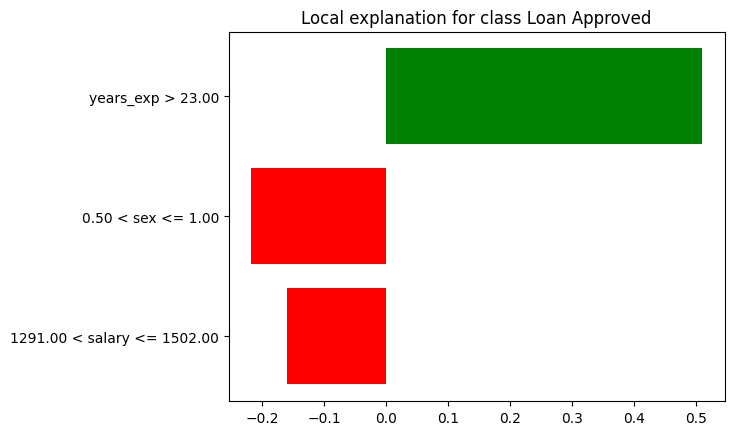

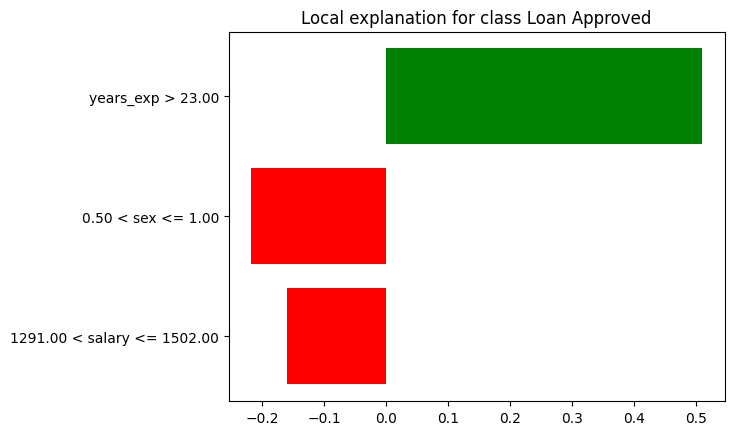

In [12]:
exp.as_pyplot_figure()
